# Data Structure

[Notes with code](https://pptassignment.notion.site/Lecture-1-Arrays-29f1ad3f7b864b40a9da62a946082ac3)\
[Annotated notes](https://pptassignment.notion.site/Lecture-1-Arrays-Annotated-notes-e44cf3b4b52a4f3a8c2bfc2dbef5a9da)

A *data structure* is a storage used to organize the data, for example a library of books. Books properly organized in a library makes their searching and retrieval easier and more efficient.

Data structures can be classified into different types in the following way.

* Types of Data Structures:
    - Linear
        + Static
            * Arrays
        + Dynamic
            * Queues, linked lists, stacks
    - Non-linear
        + Trees
        + Graphs

A *linear* data structure in which elements are arranged in a sequential way, e.g., an array. In a *non-linear* data structure, the data is arranged in a non-sequential (or a non-linear) fashion. A *static* data structure has a fixed size, whereas a *dynamic* data structure has a varying size. The more we keep adding elements in a dynamic data structure, the more its size increases. The system keeps on allocating more memory to such structures as we keep on adding more elements in them, and as soon as we remove elements, the memory is deallocated.

**Question:** Given an array of size $N$, the task is to find the maximum and minimum element present in it using the least number of comparisons.

**Example:**

Input: `arr[] = {3, 5, 4, 1, 9}`

Output: Minimum element is `1`, and the maximum element is `9`.

**Solution:** Say, we have an array `{1000, 1, -1, 2, 70, -8}`. The brute force approach will be to start comparing the first element, i.e., `1000`, with all the elements. Doing this, we will end up putting `1000` at the end of the array. We now pick the next element and compare it with all the remaining element. We will keep on doing this until we sort the array in ascending order. The time complexity will be the following. The first element goes through $n-1$ comparisons, the second element goes through $n-2$ comparisons, and so on. So, the total number of comparisons will be
$$n-1+n-2+⋯+1\approx \dfrac{n(n+1)}{2}\Rightarrow \mathcal{O}\left(n^2\right)$$

A second, and more optimal solution is the following:
1. We first sort the array in ascending order.
2. Return the first and the last elements.

The time complexity for the best sorting algorithm is $\mathcal{O}\left( n\log n \right)$

An even more optimal solution is the following:
1. We can initialize the minimum and maximum by the first element (or with $0$).
2. Keep on comparing the elements with them on the go and updating the minimum and maximum.
3. Return the minimum and maximum at the end.

The time complexity for this solution will be $\mathcal{O}\left( n \right)$ as we are traversing the array just once. Also, make sure to check the corner cases, e.g., what to return if the input array is empty, or if the array has just a single element. The following is the python code for this solution.

In [1]:
class pair:
	def __init__(self):
		self.min = 0
		self.max = 0

def getMinMax(arr: list, n: int) -> pair:
	minmax = pair()

	# If there is only one element then return it as min and max both
	if n == 1:
		minmax.max = arr[0]
		minmax.min = arr[0]
		return minmax

	# If there are more than one elements, then initialize min
	# and max
	if arr[0] > arr[1]:
		minmax.max = arr[0]
		minmax.min = arr[1]
	else:
		minmax.max = arr[1]
		minmax.min = arr[0]

	for i in range(2, n):
		if arr[i] > minmax.max:
			minmax.max = arr[i]
		elif arr[i] < minmax.min:
			minmax.min = arr[i]

	return minmax

# Driver Code
if __name__ == "__main__":
	arr = [1000, 11, 445, 1, 330, 3000]
	arr_size = len(arr)
	minmax = getMinMax(arr, arr_size)
	print("Minimum element is", minmax.min)
	print("Maximum element is", minmax.max)

Minimum element is 1
Maximum element is 3000


**Question:** You are given an array `prices` where `prices[i]` is the price of a given stock on the `i`th day. You want to maximize your profit by choosing a single day to buy one stock and choosing a different in the future to sell that stock. Return the maximum profit you can earn from this transaction. If you cannot achieve any profit, return `0`.

**Example:**

Input: `prices = [7, 1, 5, 3, 6, 4]`

Output: `5`

Explanation: Buy on day 2 (price is $1$), and sell on day 5 (price is $6$), with a profit of $5$ (i.e., $5=6-1$).

**Solution:** We *cannot* just simply extend the previous question here. The maximum of this array is $7$, and the minimum is $1$. However, if we are buying for $1$, we cannot sell it for $7$ as $7$ is in the past.

Again, the first step to solving any question is always think about the brute force method. Consider the following array.
```
[7, 1, 5, 3, 6, 4]
```
We will start with the first element, i.e., $7$, and compare it with all the future elements to see if there exists any element greater than $7$ that is also greater than all the other elements. In this case, it does not. Next, we will select the second element, i.e., $1$, and check if there is any element after it that is greater $1$ and greater than all the other elements. In this case, this element is $6$. Similarly, we will keep on going and check the maximum value of profit possible. In this case, the number of comparisons, or the time complexity will be
$$n-1+n-2+⋯+1\approx \dfrac{n(n+1)}{2}\Rightarrow \mathcal{O}\left(n^2\right)$$
A better solution is the following:

At each day, we will see the minimum of the price till now. We will keep on updating the profit and see when the profit is the maximum. To elaborate, on the first day, the profit will be $0$. On the second day, the minimum price till now is $7$, whereas the price on this day is $1$, giving us a profit of $-6$. The minimum gets updated from $7$ to $1$. And so on. So, the algorithm will be the following:
1. Let `max_profit = 0`.
2. For price at each position, calculate the `min_value` till that point. If this `min_value > price`, we will update `min_value = price`. Else, we will calculate `profit = price - min_value`.
3. We will also update the `max_profit = max(max_profit, profit)`.

The time complexity of this algorithm is $\mathcal{O}(n)$, since we are only traversing the array once. The following is its python implementation.

In [2]:
from typing import List

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        
        # Initializing `min_price` and `max_profit`
        min_price = float('inf')
        max_profit = 0
        
        # Looping over the array
        for i in range(len(prices)):
            
            # Updating `min_price`
            if prices[i] < min_price:
                min_price = prices[i]
            
            # Updating `max_profit`
            elif prices[i] - min_price > max_profit:
                max_profit = prices[i] - min_price
 
        return max_profit

solution = Solution()
print(solution.maxProfit([7, 1, 5, 3, 6, 4]))

5


**Question:** Given an integer array `nums`, find a subarray that has the largest product, and return the product. The test cases are generated so that the answer will fit in a 32-bit integer.

**Example:**

Input: `nums = [2, 3, -2, 4]`

Output: `6`

Explanation: `[2, 3]` has the largest product `6`.

**Solution:** Consider the following array.
```
[2, 3, -2, 4]
```
The brute force approach will be to check the product of all the subarrays of all the elements. So, the time complexity for this will be
$$n-1+n-2+⋯+1\approx\dfrac{n(n+1)}{2}\Rightarrow \mathcal{O}\left(n^2\right)$$
For a better solution, let us see what numbers give us a challenge:
1. If the array contains a $0$, then the product will become zero of any subarray containing it.
2. If the sub array contains an odd number of negative numbers, then the product of the subarray containing them will turn negative. However, if it contains an even number of negative numbers, then the product will turn positive.

So, at each point in time while going through the array, we have to record the `max_product` till now, the `min_product` till now, and the current element. The algorithm is the following:
1. Initialize `result = 0`.
2. While going through the numbers in the array, we will keep a track of the maximum product till that number, i.e., `max_so_far`, and the minimum product till that number, i.e., `min_so_far`.
3. The maximum and minimum products so far will be calculated as `max_so_far = max(max_so_far*current_element, min_so_far*current_element, current_element)`, and `min_so_far = min(max_so_far*current_element, min_so_far*current_element, current_element)`.
4. Update `result = max(result, max_so_far)`.

The time complexity will be $\mathcal{O}(n)$ as we are going through the array just once. The following is the python implementation.

In [3]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        
        # If the array is empty, we return 0
        if len(nums) == 0:
            return 0

        # We proceed if the array is not empty
        
        # Initializing the maximum and minimum products so far to the first element of the array
        max_so_far = nums[0]
        min_so_far = nums[0]
        
        # Initializing the result to the maximum product so far
        result = max_so_far

        # Looping through the array from the second element
        for i in range(1, len(nums)):
            
            # Getting the current element
            curr = nums[i]
            
            # Getting the maximum and minimum products so far
            temp_max = max(curr, max_so_far*curr, min_so_far*curr)
            min_so_far = min(curr, max_so_far*curr, min_so_far*curr)

            max_so_far = temp_max

            result = max(max_so_far, result)

        return result

solution = Solution()
print(solution.maxProduct([2, 3, -2, 4]))
print(solution.maxProduct([2, 3, -2, 4, 5, 6]))
print(solution.maxProduct([2, 3, -2, 4, 5, -6]))
print(solution.maxProduct([2, 3, -2, 4, 5, -6, -10]))
print(solution.maxProduct([2, 3, -2, 4, 5, -6, 10]))

6
120
1440
1440
14400


**Question:**: Given an integer array `nums`, return all the triplets `[nums[i], nums[j], nums[k]]` such that `i != j`, `i != k`, and `j != k`, and `nums[i] + nums[j] + nums[k] == 0`. Notice that the solution set must not contain duplicate triplets.

**Example:**

Input: `nums = [-1, 0, 1, 2, -1, -4]`

Output: `[[-1, -1, 2], [-1, 0, 1]]`

Explanation:

`nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0`\
`nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0`\
`nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0`

The distinct triplets are `[-1, 0, 1]` and `[-1, -1, 2]`. Notice that the order of the output and the order of the triplets does not matter.

**Solution:**

This problem is known as the ***3-sum*** problem. The brute force approach will be, for each element, finding two more elements such that their sum is $0$. So, there will be three for loops. Hence, the brute force approach will have the time complexity of $\mathcal{O}\left( n^3 \right)$.

For approaching a better solution, let us first see how we will solve a **2-sum** problem. This is one of the important approaches to solve a problem, i.e., to reduce a problem down to another problem that we known how to solve. Consider the array
```
[-5, -4, 2, 3, 9]
```
and find two distinct-index elements whose sum is $5$. To solve this, we will use an approach known as the ***2-pointer*** approach (this approach works only if the array is sorted in ascending order). We will initialize two pointers, `l` on the leftmost element, and `r` on the rightmost element.
* In the first iteration, `l = -5`, and `r = 9`. So, `l + r = 4`. Since their sum is `< 5`, we will move `l` up as we want to increase the sum.
* In this iteration, `l = -4` and `r = 9`, which means `l + r = 5`. This is one solution.
* In the next iteration, we will again move the left pointer up, giving `l = 2`, and `r = 9`, giving `l + r = 11`. As this is `> 5`, we will move the right pointer down.
* In this iteration, `l = 2` and `r = 3`, giving us `l + r = 5`, which is one more solution.
* In this iteration, no matter which pointer we move, we will get `l = r`, which means we stop.

So, the solution of the 2-sum problem is `[[-4, 9], [2, 3]]`.

Now, how to reduce the original 3-sum problem to a 2-sum problem? We will first sort the array. Consider the array `[-1, 0, 1, 2, -1, -4]`. Sorting it will get us the following array.
```
[-4, -1, -1, 0, 1, 2]
```
Now, in order to find three distinct-index element with a sum of $0$, we will do the following. For each element `i` in this array, we will find two other elements whose sum is `-i`. So, in the first iteration, `i = -4`. We will use the 2-pointer approach on the remaining array to find two elements with a sum of `4`. In the next iteration, `i = -1`, so we will use the 2-pointer approach on the remaining array to find two elements with a sum of `1`, and so on. The algorithm will be the following:
1. Sort the input array in ascending order.
2. Looping over the elements
    - Handle the corner case where the first element itself is positive. In this case, the sum will never be zero.
    - If current element is the same as the one before, skip.
    - Call the 2-sum solution for this element (say `i`), i.e.,
        + Set `l = i + 1` and `r = last_index`
        + While `l < h`,
            - if the sum `array[l] + array[r] < -array[i]`
                + increament in `l`
            - else if the sum `array[l] + array[r] > -array[i]`
                + decrement in `r`
            - else we will add the triplet `array[l]`, `array[r]`, and `array[i]` to the results, and increment in `l` and decrement in `r`.

We are first sorting, which has time complexity $\mathcal{O}\left(n\log n\right)$. For the remaining code, we are calling 2-pointer solution on each element, which means that this part of the algorithm has a time complexity of $\mathcal{O}\left( n^2 \right)$. So, the total time complexity of this algorithm is $\mathcal{O}\left( n^2 + n\log n \right) = \mathcal{O}\left( n^2 \right)$. The following is the python implementation.

In [4]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        
        # Initializing an empty array for results
        res = []
        
        # Sorting the given array
        nums.sort()
        
        # Looping through the array
        for i in range(len(nums)):
            if nums[i] > 0:
                break
            if i == 0 or nums[i - 1] != nums[i]:
                
                # Carry out two-sum method
                self.twoSumII(nums, i, res)
        return res
 
    def twoSumII(self, nums: List[int], i: int, res: List[List[int]]):
        
        # Initializing the lower and the higher pointer
        lo, hi = i + 1, len(nums) - 1
        
        while (lo < hi):
            sum = nums[i] + nums[lo] + nums[hi]
            if sum < 0:
                lo += 1
            elif sum > 0:
                hi -= 1
            else:
                res.append([nums[i], nums[lo], nums[hi]])
                lo += 1
                hi -= 1
                while lo < hi and nums[lo] == nums[lo - 1]:
                    lo += 1

solution = Solution()

nums = [-1, 0, 1, 2, -1, -4]
print(solution.threeSum(nums=nums))

nums = [3, 2, 5, 6, 7, 8, 1]
print(solution.threeSum(nums=nums))

nums = [3, -5, 2, 5, 6, 7, 8, 1]
print(solution.threeSum(nums=nums))

[[-1, -1, 2], [-1, 0, 1]]
[]
[[-5, 2, 3]]


**Question:** Given an integer array `nums` and an integer `k`, return the `k`-th largest element in the array. Note that it is the `k`-th largest element in the sorted order, not the `k`-th distinct element.

**Example:**

Input: `nums = [3,2,1,5,6,4]`, `k = 2`.
Output: `5`.

**Solution:**

The brute force approach will be to first sort the array and then return the $(k-1)$ th element from the end. The time complexity for this will be $\mathcal{O}\left( n\log n \right)$.

A better approach will be using priority queue. Priority queue is implemented using a ***heap***. A heap is nothing but a complete binary tree.

Types of heaps:
* Max-heap.
    - Here, the value of the parent node is greater than its children.
* Min-heap.
    - Here, the value of the parent node is lesser than its children.

For our example, we will use min-heap, in the following way. Consider the same array, i.e., `[3,2,1,5,6,4]` with `k = 2`. In this case, have a look at the following illustration for `k = 2`.

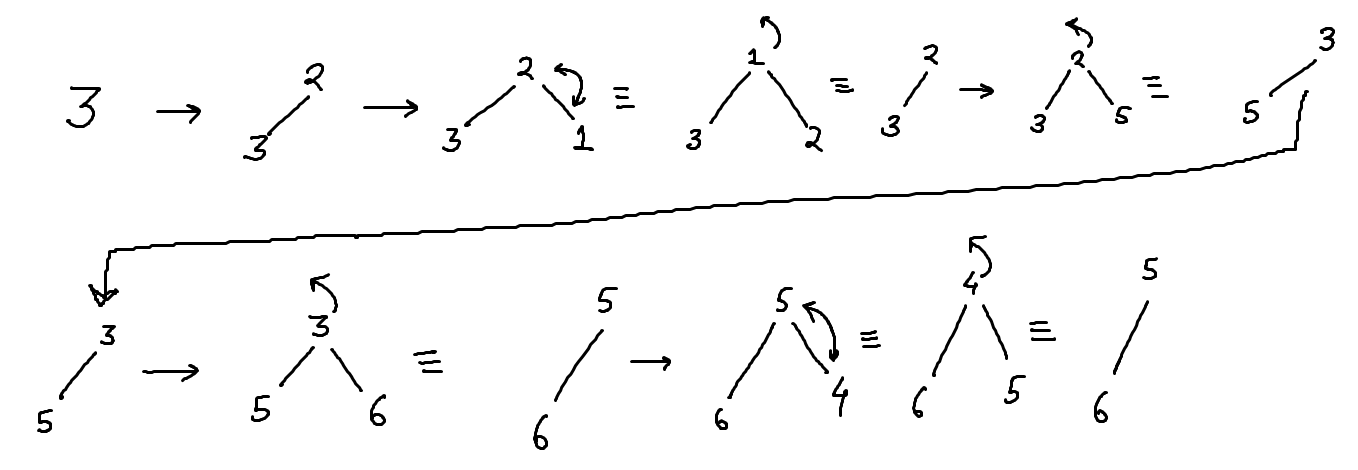

We can see that this keeps a record of the `k` (` = 2`) largest elements of the array. So, we will return the top element of this heap to get the answer. The algorithm is the following:
1. Create a min-heap and add all elements from the array into the heap one by one.
2. At each point, the heap stores `k` largest elements.
3. At the end, the answer is the head of the heap.

The time complexity of a heapify operation for a heap of $k$ elements is $\mathcal{O}\left( \log k \right)$. Hence, the time complexity of the entire algorithm is $n\times \mathcal{O}\left( \log k \right)$. The python implementation is shown below.

In [5]:
import heapq


class Solution:
    def findKthLargest(self, nums: List[int], k: int):
        return heapq.nlargest(k, nums)[-1]

solution = Solution()

nums = [3,2,1,5,6,4]
k = 2
print(solution.findKthLargest(nums=nums, k=k))

5


**Question:** Given an integer array `nums` and an integer `k`, return the `k`-th smallest element in the array. Note that it is the `k`-th smallest element in the sorted order, not the `k`-th distinct element.

**Example:**

Input: `nums = [3,2,1,5,6,4]`, `k = 2`.
Output: `2`.

**Solution:** This is very similar to the previous question, except this time we are supposed to form a max-heap. The following is the python implementation.

In [6]:
def find_kth_smallest(nums, k):
    return heapq.nsmallest(k, nums)[-1]

nums = [3,2,1,5,6,4]
k = 2
print(find_kth_smallest(nums=nums, k=k))

2
